## Function to create training data for the 1D wave equation 

Result is deflection over space and time y_x for differnt excitation
positions with a delta-function at t=0. 


Author: M. Schäfer, 2022

Python Translation: S. Schlecht

## Basic Parameter Set

In [ ]:
import numpy as np

f = 4410      # sampling frequency  
T = 1/f        # sampling time 
dur = 1       # simulation duration

t = np.arange(0, dur+T/2, T) # 0:T:dur;    # time vector 

l = 5          # length of the pipe 
dx = 1e-2      # spatial stepsize 
xs = np.arange(0, l+dx/2, dx) # 0:dx:l;    # space vector 
numXs = np.size(xs)

#c0 = 340
c0 = 30       # propagation speed

## FTM Stuff

In [ ]:
Mu = 250       # number of eigenvalues 
mu = np.arange(1, Mu+1) # 1:Mu;    

test = 1j*c0*mu*np.pi/l

gmu = np.concatenate((mu*np.pi/l, mu*np.pi/l))
smu = np.concatenate((1j*c0*mu*np.pi/l, -1j*c0*mu*np.pi/l))

K1 = lambda x: 1j*np.sin(gmu*x) # @(x) 1j*sin(gmu*x); 
K2 = lambda x: 1j*smu*np.sin(gmu*x)
Ka1 = lambda x: 1j/c0**2*np.conj(smu)*np.sin(gmu*x)
Ka2 = lambda x: 1j*np.sin(gmu*x)

nmu = 1./(l/2*(c0**2*smu + np.conj(smu)))

A = np.diag(np.exp(smu*T)); 


4411

In [ ]:
xeVec = np.array([0.1*l, 0.2*l, 0.3*l]) # vector of excitaion positions (can be extended) 

for xe, xeVal in enumerate(xeVec): #for xe = 1:length(xeVec)
    
    # Excitation for the wave equation is a simple delta-impulse at
    # position xe
    # Possible extensions: 
    # - exciation by a hamming window to have a more smooth excitation 
    # - combination with a temporal exciation shape 
    yi = Ka2(xeVal)*T; # set initial values for states
    
    # vectors 
    ybar = np.zeros((2*Mu, np.size(t)),dtype=complex); 
    
    # set initial states
    ybar[:,0] = yi; 
    
    test = range(1,np.size(t))
    
    # processing to create time progression of individual states
    for k in range(1,np.size(t)) :
        ybar[:,k] = A@ybar[:,k-1]
    
    
    # create output signal over time at a single observation position
    # (maybe this part is not necessary, therefore it is commented)
    xo = 0.7*l; 
    c1 = K1(xo); 
    y = c1@ybar; # recover deflection from states (inverse transformation)
    y = np.real(y)
    
    
    # create spatial vectors. 
    # Result y_x: spatial distribution of the deflection y on the pipe at all
    # temportal sampling points
    
    K1_x = np.zeros((np.size(xs), 2*Mu)); 
    y_x = np.zeros((np.size(xs), np.size(t))); 

    for xi in range(np.size(xs)) : #1:length(xs) 
        K1_x[xi,:] = K1(xs[xi])/nmu; 
        y_x[xi,:] = K1_x[xi,:]@ybar; 
    
    # take the real part because there might be a small imaginary part 
    y_x = np.real(y_x); 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


# Plot

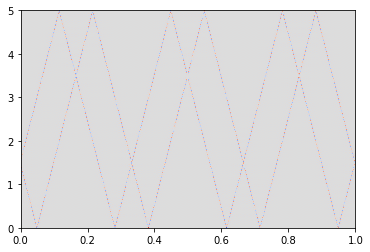

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots()

X, Y = np.meshgrid(t, xs)

surf = plt.pcolormesh(X, Y, y_x, cmap=cm.coolwarm) #,linewidth=0, antialiased=False
